# Survival Prediction on Titanic

This project aims to use diﬀerent data processing techniques and Feature Engineering to cleanse the raw data from a dataset containing the information about passengers on Titanic and their status of survival followed by training a machine learning model on the training data to predict the possibility of survival of other passengers.

### Importing the Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the dataset

In [3]:
dataset = pd.read_csv('train.csv')
train_data = dataset
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Handling the missing Data

In [4]:
# Handling the missing age data
from sklearn.preprocessing import Imputer
impute_age = Imputer(missing_values='NaN',strategy='mean',axis=0)

train_data['Age'] = impute_age.fit_transform(train_data['Age'].values.reshape(-1,1))

# Handling the missing Embarked values
train_data.Embarked = train_data.Embarked.fillna('S')

C:\Users\HARSHIT KUMAR\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


 ## Data Visualization

### Analyzing total number of survivals

In [5]:
status = sorted(dataset.Survived.unique())
no_of_survivals=[len(dataset[dataset.Survived==0]),len(dataset[dataset.Survived==1])]

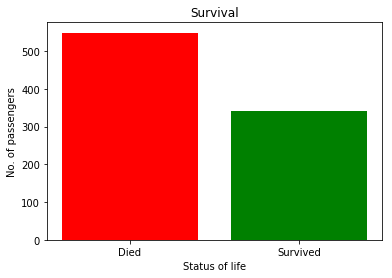

In [6]:
plt.bar(status,no_of_survivals,tick_label=['Died','Survived'],color=['r','g'])
plt.title('Survival')
plt.xlabel('Status of life')
plt.ylabel('No. of passengers')
plt.show()

### Analyzing Survival Based on Passengers' class

In [7]:
pclass = sorted(dataset.Pclass.unique())
pclass_passengers = [len(dataset[dataset.Pclass==1]),len(dataset[dataset.Pclass==2]),len(dataset[dataset.Pclass==3])]
pclass_survivals=[len(dataset[(dataset.Survived==1)&(dataset.Pclass==1)]),len(dataset[(dataset.Survived==1)&(dataset.Pclass==2)]),len(dataset[(dataset.Survived==1)&(dataset.Pclass==3)])]

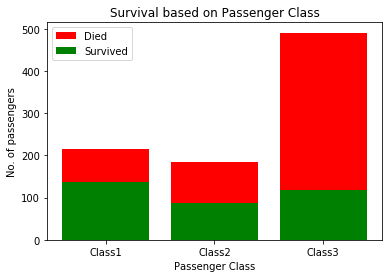

In [8]:
plt.bar(pclass,pclass_passengers,tick_label=['Class1','Class2','Class3'],color='r',label='Died')
plt.bar(pclass,pclass_survivals,color='g',label='Survived')
plt.title('Survival based on Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('No. of passengers')
plt.legend()
plt.show()

### Analyzing Survival Based on Passengers' gender

In [9]:
gender = sorted(dataset.Sex.unique())
gender_passengers = [len(dataset[dataset.Sex=='female']),len(dataset[dataset.Sex=='male'])]
gender_survivals=[len(dataset[(dataset.Survived==1)&(dataset.Sex=='female')]),len(dataset[(dataset.Survived==1)&(dataset.Sex=='male')])]

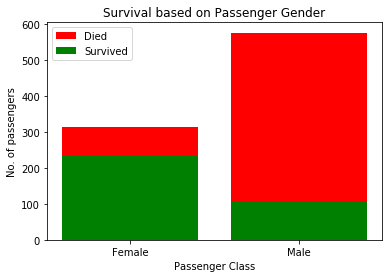

In [10]:
plt.bar(gender,gender_passengers,tick_label=['Female','Male'],color='r',label='Died')
plt.bar(gender,gender_survivals,color='g',label='Survived')
plt.title('Survival based on Passenger Gender')
plt.xlabel('Passenger Class')
plt.ylabel('No. of passengers')
plt.legend()
plt.show()

### Analyzing Survival Based on Passengers' cabin

In [11]:
cabin = ['Cabin assigned','Cabin not assigned']
cabin_passengers = [len(dataset[dataset.Cabin.notnull()]),len(dataset[dataset.Cabin.isnull()])]
cabin_survivals=[len(dataset[(dataset.Survived==1)&(dataset.Cabin.notnull())]),len(dataset[(dataset.Survived==1)&(dataset.Cabin.isnull())])]

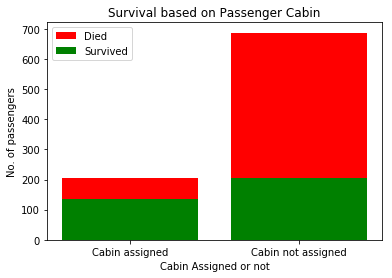

In [12]:
plt.bar(cabin,cabin_passengers,tick_label=['Cabin assigned','Cabin not assigned'],color='r',label='Died')
plt.bar(cabin,cabin_survivals,color='g',label='Survived')
plt.title('Survival based on Passenger Cabin')
plt.xlabel('Cabin Assigned or not')
plt.ylabel('No. of passengers')
plt.legend()
plt.show()

### Analyzing Survival Based on Passengers' Port of embarkation

In [13]:
embarked = ['C','Q','S']
embarked_passengers = [len(dataset[dataset.Embarked=='C']),len(dataset[dataset.Embarked=='Q']),len(dataset[dataset.Embarked=='S'])]
embarked_survivals=[len(dataset[(dataset.Survived==1)&(dataset.Embarked=='C')]),len(dataset[(dataset.Survived==1)&(dataset.Embarked=='Q')]),len(dataset[(dataset.Survived==1)&(dataset.Embarked=='S')])]

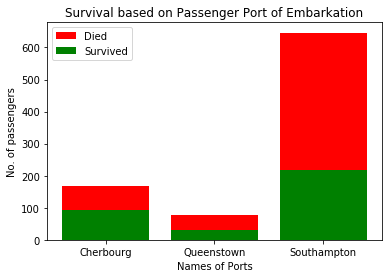

In [14]:
plt.bar(embarked,embarked_passengers,tick_label=['Cherbourg','Queenstown','Southampton'],color='r',label='Died')
plt.bar(embarked,embarked_survivals,color='g',label='Survived')
plt.title('Survival based on Passenger Port of Embarkation')
plt.xlabel('Names of Ports')
plt.ylabel('No. of passengers')
plt.legend()
plt.show()

### Analyzing Survival based on Passengers' Age

In [15]:
age_survivals = (train_data[train_data.Survived==1]).Age
age_deaths = (train_data[train_data.Survived==0]).Age
bins = [0,5,10,15,20,25,30,35,40,45,50,55,60,80]

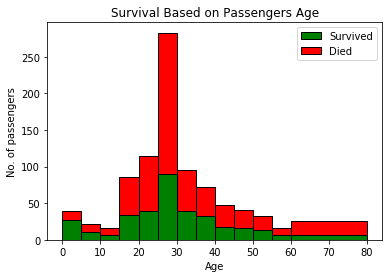

In [16]:
plt.hist([age_survivals,age_deaths],color=['g','r'],label=['Survived','Died'],edgecolor='k',stacked=True,bins=bins)
plt.title("Survival Based on Passengers Age")
plt.xlabel("Age")
plt.ylabel("No. of passengers")
plt.legend()
plt.show()

### Analyzing Survival based on Passengers' Fare

In [17]:
fare_survivals = (train_data[train_data.Survived==1]).Fare
fare_deaths = (train_data[train_data.Survived==0]).Fare

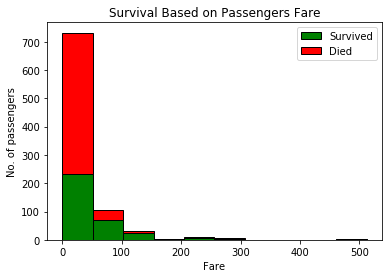

In [18]:
plt.hist([fare_survivals,fare_deaths],color=['g','r'],label=['Survived','Died'],edgecolor='k',stacked=True)
plt.title("Survival Based on Passengers Fare")
plt.xlabel("Fare")
plt.ylabel("No. of passengers")
plt.legend()
plt.show()

## Feature Engineering

In [19]:
family_members=train_data.Parch+train_data.SibSp
train_data["FamilyMembers"] = family_members

### Analyzing Survival based on Passengers' Family Members

In [20]:
family_survivals = (train_data[train_data.Survived==1]).FamilyMembers
family_deaths = (train_data[train_data.Survived==0]).FamilyMembers
bins = [0,1,2,3,4,5,6,7,8,9,10]

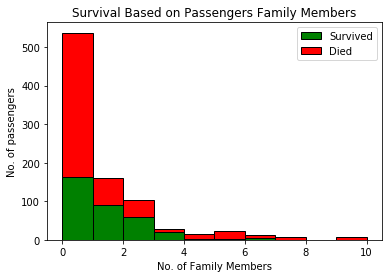

In [21]:
plt.hist([family_survivals,family_deaths],color=['g','r'],label=['Survived','Died'],edgecolor='k',stacked=True,bins=bins)
plt.title("Survival Based on Passengers Family Members")
plt.xlabel("No. of Family Members")
plt.ylabel("No. of passengers")
plt.legend()
plt.show()

### Adding three more features

In [22]:
age_group =[]
family_size = []
cabin_status=[]

In [23]:
for i in train_data.Age:
    if(i<15):
        age_group.append(2)
    elif((i>=15)and(i<40)):
        age_group.append(0)
    else:
        age_group.append(1)

In [24]:
for i in train_data.FamilyMembers:
    if(i==0):
        family_size.append(1)
    elif((i>=1)and(i<=3)):
        family_size.append(2)
    else:
        family_size.append(0)

In [25]:
train_data.Cabin=train_data.Cabin.fillna(0)
for i in train_data.Cabin:
    if(i!=0):
        cabin_status.append(1)
    else:
        cabin_status.append(0)

In [26]:
train_data["AgeGroup"] = age_group
train_data["FamilySizeCategory"] = family_size
train_data["CabinStatus"]=cabin_status

### Dropping irrelevant columns

In [27]:
real_train_y = (train_data.Survived).values
train_data = train_data.drop(["PassengerId","Survived","FamilyMembers","Name","Ticket","Cabin"],axis=1)

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Pclass                891 non-null int64
Sex                   891 non-null object
Age                   891 non-null float64
SibSp                 891 non-null int64
Parch                 891 non-null int64
Fare                  891 non-null float64
Embarked              891 non-null object
AgeGroup              891 non-null int64
FamilySizeCategory    891 non-null int64
CabinStatus           891 non-null int64
dtypes: float64(2), int64(6), object(2)
memory usage: 69.7+ KB


### Handling categorical variables

In [29]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le_1 = LabelEncoder()
le_2 = LabelEncoder()
le_3 = LabelEncoder()
le_4 = LabelEncoder()
le_5 = LabelEncoder()
le_6 = LabelEncoder()

In [30]:
train_data.Pclass = le_1.fit_transform(train_data.Pclass)
train_data.Sex = le_2.fit_transform(train_data.Sex)
train_data.Embarked = le_3.fit_transform(train_data.Embarked)
train_data.AgeGroup = le_4.fit_transform(train_data.AgeGroup)
train_data.FamilySizeCategory = le_5.fit_transform(train_data.FamilySizeCategory)
train_data.CabinStatus = le_6.fit_transform(train_data.CabinStatus)

In [31]:
train_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,FamilySizeCategory,CabinStatus
0,2,1,22.0,1,0,7.2500,2,0,2,0
1,0,0,38.0,1,0,71.2833,0,0,2,1
2,2,0,26.0,0,0,7.9250,2,0,1,0
3,0,0,35.0,1,0,53.1000,2,0,2,1
4,2,1,35.0,0,0,8.0500,2,0,1,0


In [32]:
ohe = OneHotEncoder(categorical_features=[0,6,7,8])

train_data = pd.DataFrame(ohe.fit_transform(train_data).toarray())

C:\Users\HARSHIT KUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\HARSHIT KUMAR\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [33]:
train_data = train_data.drop([0,3,6,9],axis=1)

In [39]:
train_data.head()

,1,2,4,5,7,8,10,11,12,13,14,15,16,17
0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,22.0,1.0,0.0,7.2500,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,38.0,1.0,0.0,71.2833,1.0
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,26.0,0.0,0.0,7.9250,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,35.0,1.0,0.0,53.1000,1.0
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,35.0,0.0,0.0,8.0500,0.0


### Splitting the dataset into training and test datasets

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(train_data.values,dataset.Survived.values,test_size=0.2,random_state=0)

### Feature Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.fit_transform(X_test)

In [42]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.507888,0.893297,-0.31427,-1.639853,-0.465933,-0.308844,-1.234837,1.438390,-1.372075,-0.002824,-0.464452,1.959264,-0.331679,-0.544888
1,1.968937,-1.119448,-0.31427,0.609811,-0.465933,-0.308844,0.809823,-0.695222,0.728823,0.096629,-0.464452,-0.477410,-0.426405,-0.544888
2,1.968937,-1.119448,-0.31427,-1.639853,-0.465933,-0.308844,-1.234837,1.438390,0.728823,0.096629,0.412710,0.740927,0.102620,-0.544888
3,-0.507888,0.893297,-0.31427,-1.639853,-0.465933,-0.308844,0.809823,-0.695222,0.728823,-0.744332,-0.464452,-0.477410,-0.555896,-0.544888
4,-0.507888,0.893297,-0.31427,0.609811,-0.465933,-0.308844,0.809823,-0.695222,0.728823,-0.667881,-0.464452,-0.477410,-0.491276,-0.544888


In [44]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,-0.519137,0.940325,-0.279845,-1.562788,-0.501745,-0.313304,0.820303,-0.710072,0.773443,0.011619,-0.531327,-0.460066,-0.399034,-0.545070
1,-0.519137,0.940325,-0.279845,0.639882,-0.501745,-0.313304,0.820303,-0.710072,0.773443,0.011619,-0.531327,-0.460066,-0.543336,-0.545070
2,-0.519137,0.940325,3.573406,-1.562788,-0.501745,3.191786,-1.219062,-0.710072,0.773443,-1.783119,3.743167,0.889964,-0.092673,-0.545070
3,-0.519137,-1.063462,-0.279845,-1.562788,-0.501745,-0.313304,-1.219062,1.408309,-1.292920,0.011619,0.537297,-0.460066,2.359513,1.834626
4,-0.519137,0.940325,-0.279845,-1.562788,-0.501745,-0.313304,-1.219062,1.408309,-1.292920,-0.043658,-0.531327,2.239995,-0.382584,-0.545070


### Fitting the Random Forest Classifier model on the training dataset

In [36]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=0)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

### Predicting the results

In [37]:
y_pred = model.predict(X_test)

### Determining the accuracy of the model

In [38]:
from sklearn.metrics import accuracy_score
accuracy_percentage = (accuracy_score(y_test,y_pred)*100).round(3)
print("We predicted the survival of passengers with an accuracy of ")
print(accuracy_percentage,"%")

We predicted the survival of passengers with an accuracy of 
82.682 %
